In [9]:
import pandas as pd
import numpy
import networkx as nx 
import dynetx as dn
import matplotlib.pyplot as plt
import random
from alive_progress import alive_bar
import time
from collections import defaultdict

## (n, m) Anonymity & Betweenness Centrality

In [24]:
# (n,m) anonymity Implementation

def n_m_anonymity(G):
    
    # Create ego network
    ego_properties = {}
    temp = {}

    # Obtain (n, m) value for each node
    for node in G.nodes():
        ego_net = nx.ego_graph(G, node)
        
        n = ego_net.number_of_nodes()
        m = ego_net.number_of_edges()
        
        ego_properties[node] = (n, m)
    
    # Store nodes as keys and the frequency of its (n,m) in the network as values
    frequency_dict = {}
    for node, (n, m) in ego_properties.items():
        freq_count = sum(1 for props in ego_properties.values() if props == (n, m))
        frequency_dict[node] = freq_count
    
    # for node in ego_properties.keys():
    #     # Todo: select the corresponding key= node in ego_properties
    #     # Remember the corresponding (n,m) tuple
    #     # Go through the entire dictionary values, get the frequency of this (n,m) tuple
    #     # For this key=node, assign the frequency to the value
    #     # loop over all the nodes and do the same
    #     for properties in ego_properties.values():
    #         if properties in frequency_dict:
    #             frequency_dict[properties] += 1
    #         else:
    #             frequency_dict[properties] = 1

    # Calculate the percentage of nodes with unique (n, m) values (frequency of 1)
    unique_count = sum(1 for count in frequency_dict.values() if count == 1)
    total_nodes = G.number_of_nodes()
    percentage_unique = (unique_count / total_nodes) * 100  
    #print("Percentage of nodes with unique (n, m) values:", percentage_unique)
    #print("Number of unique nodes:", unique_count)
    
    return frequency_dict

In [2]:
def n_m_anonymity2(G):
    frequency_dict = defaultdict(int)

    # Obtain (n, m) value for each node and count their frequencies
    for node in G.nodes():
        ego_net = nx.ego_graph(G, node)
        n = ego_net.number_of_nodes()
        m = ego_net.number_of_edges()
        frequency_dict[(n, m)] += 1

    # Calculate the percentage of nodes with unique (n, m) values (frequency of 1)
    unique_count = sum(1 for count in frequency_dict.values() if count == 1)
    total_nodes = G.number_of_nodes()
    percentage_unique = (unique_count / total_nodes) * 100

    return frequency_dict

In [15]:
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)

# # Add timestamps as labels to the edges
# edge_labels = {(u, v): f"{d['timestamp']}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# plt.show()

In [3]:
def betweenness_centra(G):
    
    betweenness_centrality = nx.betweenness_centrality(G)

    betweenness_ranking = {node: centrality for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)}

    # print("Betweenness Centrality Ranking (as dictionary):")
    # print(betweenness_ranking)
    return betweenness_ranking

## Toy Network Experiment on Anonymity & Centrality

In [6]:
G = nx.Graph()
G.add_nodes_from(range(0, 200))
num_timestamps = 10

# for timestamp in range(1, num_timestamps+1):
#     edge = random.sample(list(G.nodes()), k=random.randint(50,80))
#     edges = [(u, v, {'timestamp': timestamp}) for u in edge for v in edge if u != v]
#     G.add_edges_from(edges)

for timestamp in range(1, num_timestamps + 1):
    edge = random.sample(list(G.nodes()), k=random.randint(30, 50))
    for u in edge:
        for v in edge:
            if u != v:
                p = random.random()
                if p < 0.5:
                    G.add_edge(u, v, timestamp=timestamp)

print(G.number_of_nodes(), G.number_of_edges())

200 4798


In [7]:
# Get Top 10% and Last 10% of the nodes in betweeness ranking
rank = betweenness_centra(G)

top_10 = list(rank.keys())[:int(0.1 * len(rank))]
last_10 = list(rank.keys())[int(0.9 * len(rank)):]
mid_10 = list(rank.keys())[int(0.4 * len(rank)) : int(0.5 * len(rank))]

In [10]:
# Get (n, m) anonymity and find top 10% & last 10% of nodes with their (n, m) anonymity
temp = n_m_anonymity2(G)
top_10_percent_nodes_values = {node: temp[node] for node in top_10}
mid_10_percent_nodes_values = {node: temp[node] for node in mid_10}
last_10_percent_nodes_values = {node: temp[node] for node in last_10}
print("Top 10% Nodes with frequency of (n, m): ", top_10_percent_nodes_values)
print("Last 10% Nodes with frequency of (n, m): ", last_10_percent_nodes_values)
print("Middle 10% Nodes with frequency of (n, m): ", mid_10_percent_nodes_values)

Top 10% Nodes with frequency of (n, m):  {157: 0, 23: 0, 65: 0, 121: 0, 92: 0, 112: 0, 14: 0, 161: 0, 162: 0, 68: 0, 69: 0, 196: 0, 41: 0, 166: 0, 114: 0, 86: 0, 100: 0, 167: 0, 70: 0, 21: 0}
Last 10% Nodes with frequency of (n, m):  {3: 0, 10: 0, 18: 0, 29: 0, 64: 0, 71: 0, 82: 0, 84: 0, 109: 0, 126: 0, 130: 0, 132: 0, 137: 0, 141: 0, 164: 0, 168: 0, 169: 0, 171: 0, 185: 0, 197: 0}
Middle 10% Nodes with frequency of (n, m):  {158: 0, 188: 0, 123: 0, 177: 0, 150: 0, 76: 0, 56: 0, 34: 0, 131: 0, 61: 0, 124: 0, 182: 0, 173: 0, 175: 0, 46: 0, 151: 0, 145: 0, 128: 0, 140: 0, 36: 0}


In [11]:
temp

defaultdict(int,
            {(26, 272): 2,
             (30, 357): 1,
             (37, 545): 1,
             (1, 0): 20,
             (74, 1403): 1,
             (33, 442): 1,
             (28, 319): 1,
             (78, 1667): 1,
             (69, 1219): 1,
             (28, 318): 1,
             (61, 1203): 1,
             (88, 1922): 1,
             (28, 286): 1,
             (107, 2408): 1,
             (77, 1422): 1,
             (29, 329): 1,
             (32, 400): 1,
             (30, 351): 1,
             (66, 1237): 1,
             (77, 1377): 1,
             (21, 163): 1,
             (114, 2723): 1,
             (33, 444): 1,
             (61, 1065): 1,
             (26, 260): 1,
             (76, 1534): 1,
             (63, 1277): 1,
             (72, 1364): 1,
             (43, 532): 1,
             (20, 156): 1,
             (72, 1309): 1,
             (51, 774): 1,
             (36, 515): 1,
             (58, 1058): 1,
             (62, 958): 1,
             (75, 1312

#### Experiment Record
Network: 150 nodes, 10834 edges, 20 timestamp, every timestamp 80-100 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {2: 27, 10: 27, 16: 27, 17: 27, 20: 27, 31: 27, 38: 27, 43: 27, 46: 27, 49: 27, 52: 27, 54: 27, 55: 27, 66: 27, 67: 27}

Last 10% Nodes with frequency of (n, m):  {65: 1, 48: 1, 86: 1, 22: 1, 103: 1, 133: 1, 79: 1, 118: 1, 60: 1, 35: 1, 37: 1, 4: 1, 131: 1, 80: 1, 81: 1}

Network: 150 nodes, 10888 edges, 20 timestamp, every timestamp 30-80 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {2: 27, 10: 27, 16: 27, 17: 27, 20: 27, 31: 27, 38: 27, 43: 27, 46: 27, 49: 27, 52: 27, 54: 27, 55: 27, 66: 27, 67: 27}

Last 10% Nodes with frequency of (n, m):  {65: 1, 48: 1, 86: 1, 22: 1, 103: 1, 133: 1, 79: 1, 118: 1, 60: 1, 35: 1, 37: 1, 4: 1, 131: 1, 80: 1, 81: 1}

Network: 150 nodes, 10758 edges, 20 timestamp, every timestamp 30-80 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {1: 13, 7: 13, 29: 13, 38: 13, 54: 13, 55: 13, 79: 13, 80: 13, 96: 13, 100: 13, 102: 13, 134: 13, 147: 13, 128: 1, 73: 1}

Last 10% Nodes with frequency of (n, m):  {25: 2, 30: 1, 21: 1, 129: 1, 104: 1, 39: 1, 59: 1, 69: 1, 124: 1, 67: 1, 45: 1, 11: 1, 145: 1, 113: 1, 142: 1}

Network: 150 nodes, 4944 edges, 10 timestamp, every timestamp 20-50 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {59: 1, 135: 1, 46: 1, 79: 1, 109: 1, 129: 1, 3: 1, 134: 1, 142: 1, 45: 1, 66: 1, 94: 1, 71: 1, 5: 1, 81: 1}

Last 10% Nodes with frequency of (n, m):  {110: 3, 112: 3, 115: 4, 116: 8, 118: 12, 119: 5, 123: 8, 125: 8, 128: 8, 130: 4, 138: 8, 139: 3, 144: 6, 147: 5, 148: 6}

Network: 150 nodes, 4944 edges, 10 timestamp, every timestamp 20-50 nodes are sampled

Top 10% Nodes with frequency of (n, m):  {59: 1, 135: 1, 46: 1, 79: 1, 109: 1, 129: 1, 3: 1, 134: 1, 142: 1, 45: 1, 66: 1, 94: 1, 71: 1, 5: 1, 81: 1}

Last 10% Nodes with frequency of (n, m):  {110: 3, 112: 3, 115: 4, 116: 8, 118: 12, 119: 5, 123: 8, 125: 8, 128: 8, 130: 4, 138: 8, 139: 3, 144: 6, 147: 5, 148: 6}


Experiment on Toy Networks shows that:

1. The larger the network is (nodes & edges), the less likely all the nodes have the same (n, m) anonymity, when the network is small, 

2. So far we can not determine if the betweenness centrality ranking is correlated with (n, m) anonymity because during the experiment, sometimes the top 10% nodes of the betweenness all are uniquely identifiable (size of (n,m) is 1), sometimes it's the other way around, sometimes the middle part become more dangerous.

In [42]:
top_10_percent_nodes_values = {node: n_m_anonymity(G)[node] for node in top_10}

top_10_percent_nodes_values
# x_values = []
# y_values = []
# for node, frequency in top_10_percent_nodes_values.items():
#     x_values.append(node)
#     y_values.append(frequency)

# # Plot the top 10% nodes with frequencies
# plt.figure(figsize=(10, 6))
# plt.scatter(x_values, y_values, color='blue')
# plt.title('Top 10% Nodes with Frequency of (n, m)')
# plt.xlabel('Node')
# plt.ylabel('Frequency')
# plt.show()


{9: 1, 4: 1, 40: 1, 45: 1, 35: 1}

## Real Network Experiment

### Network 1: Reality Call
Sr: https://networkrepository.com/ia-reality-call.php

6.8k nodes, 51.2k edges

In [12]:
edge_list_file = 'data/ia-reality-call.edges'
edges = []

with open(edge_list_file, 'r') as file:
    for line in file:
        source, target, _ = map(int, line.strip().split(',')[:3])
        edge = (source, target)
        if edge not in edges:
            edges.append(edge)   # dropping repeating edges, each edge only appear once

In [13]:
G = nx.DiGraph()
G.add_edges_from(edges)
G.number_of_edges()

9484

In [29]:
def snapshots_uniqueness(edges):
    unique_percentage = []
    count = []
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()
    
    for i in range(1, M, int(0.02*M)):
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
            
        # print("Snapshot", i)
        # print("No. of Nodes:", snapshot.number_of_nodes(), "No. of Edges:",snapshot.number_of_edges())
            
        #anonymity_dict = n_m_anonymity(snapshot)
        anonymity_dict = n_m_anonymity2(snapshot)
        unique_count = sum(1 for count in anonymity_dict.values() if count == 1)
        total_nodes = snapshot.number_of_nodes()
        percentage_unique = (unique_count / total_nodes) * 100  
            
        # print("No. of Unique nodes:", unique_count, "Percentage of Uniqueness: ", percentage_unique)
            
        unique_percentage.append(percentage_unique)
        count.append(unique_count)
    
    return count, unique_percentage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


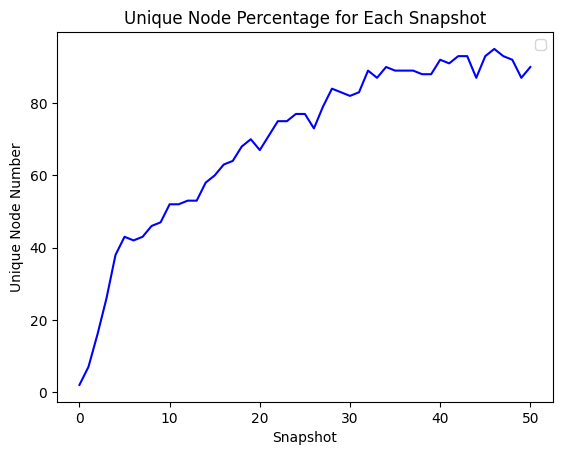

In [30]:
#sample_set = [100, 200, 500, 1000, 2000, 5000, 8000, 10000, 15000, 22000, 30000]
count, unique_percentage = snapshots_uniqueness(edges)

plt.plot(count, linestyle='-', color='b')
#plt.plot(unique_percentage, linestyle='-', color='r')
plt.xlabel('Snapshot')
plt.ylabel('Unique Node Number')
plt.title('Unique Node Percentage for Each Snapshot')
#plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()

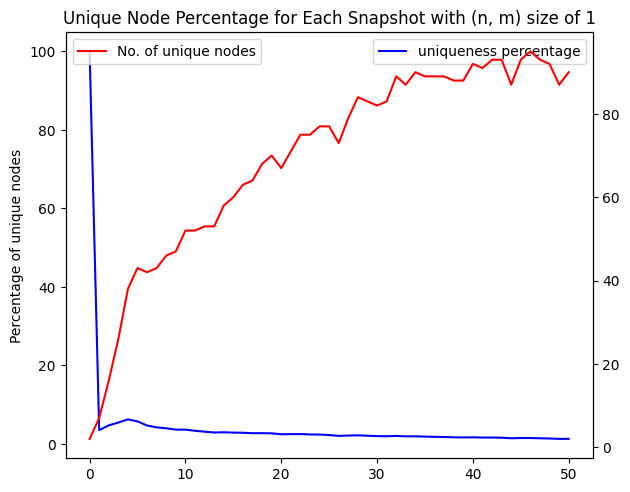

In [31]:
fig, ax1 = plt.subplots()
#ax1.set_xlable('Snapshot at Timestamp')
ax1.set_ylabel('Percentage of unique nodes')
ax1.plot(unique_percentage, linestyle='-', color='b', label='uniqueness percentage')
# ax1.plot(top_closeness, linestyle='-', color='y', label='Top 10% Closeness')
# ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()
ax2.set_label('Average Degree/Distance')

ax2.plot(count, linestyle='-', color='r', label='No. of unique nodes')
# ax2.plot(avg_dist, linestyle='-', color='g', label='Average Distance')
# plt.plot(density, linestyle='-', color='purple', label='Density')
# ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
# plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()  

In [13]:
# # Save Data
# output_file = 'unique_percentage.txt'

# with open(output_file, 'w') as file:
#     for item in unique_percentage:
#         file.write(f"{item}\n")
        

# Reload Data
# loaded_list = []
# input_file = 'unique_percentage.txt'

# with open(input_file, 'r') as file:
#     for line in file:
#         #loaded_list.append(int(line.strip()))
#         loaded_list.append(line)

with open("unique_percentage.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines = [line.strip() for line in file.readlines()]

# Convert the strings to floats
data_list = [float(line) for line in lines]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


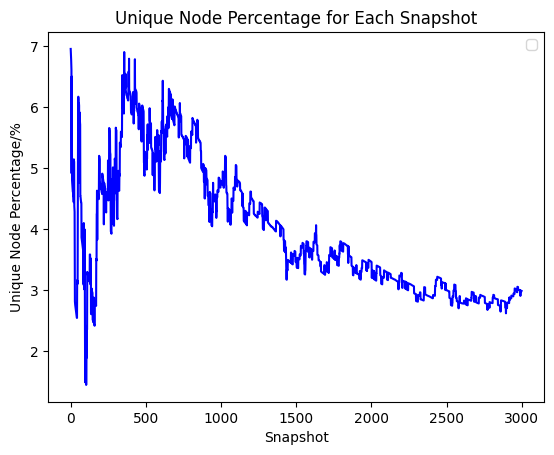

In [17]:
with open("unique_percentage.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines = [line.strip() for line in file.readlines()]

# Convert the strings to floats
unique_percentage = [float(line) for line in lines]

plt.plot(unique_percentage, linestyle='-', color='b')
plt.xlabel('Snapshot')
plt.ylabel('Unique Node Percentage/%')
plt.title('Unique Node Percentage for Each Snapshot')
#plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()

In [22]:
def snapshots_uniqueness_betweenness(edges):
    unique_top10 = []
    unique_mid10 = []
    unique_last10 = []
    
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()

    for i in range(1, M, int(0.02*M)):
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        
        # anonymity_dict = n_m_anonymity(snapshot)
        anonymity_dict = n_m_anonymity(snapshot)
        rank = betweenness_centra(snapshot)

        top_10 = list(rank.keys())[:int(0.1 * len(rank))]
        last_10 = list(rank.keys())[int(0.9 * len(rank)):]
        mid_10 = list(rank.keys())[int(0.4 * len(rank)) : int(0.5 * len(rank))]
        
        top_10_percent_nodes_values = {node: anonymity_dict[node] for node in top_10}
        mid_10_percent_nodes_values = {node: anonymity_dict[node] for node in mid_10}
        last_10_percent_nodes_values = {node: anonymity_dict[node] for node in last_10}
        
        total_nodes = snapshot.number_of_nodes()
        
        # Top 10%
        unique_count_top = sum(1 for count in top_10_percent_nodes_values.values() if count == 1)
        #percentage_unique_top = (unique_count_top / total_nodes) * 100
        unique_top10.append(unique_count_top)

        # mid 10%
        unique_count_mid = sum(1 for count in mid_10_percent_nodes_values.values() if count == 1)
        percentage_unique_mid = (unique_count_mid / total_nodes) * 100
        unique_mid10.append(unique_count_mid)
        
        # Last 10%
        unique_count_last = sum(1 for count in last_10_percent_nodes_values.values() if count == 1)
        percentage_unique_last = (unique_count_last / total_nodes) * 100
        unique_last10.append(unique_count_last)
             
    return unique_top10, unique_mid10, unique_last10

In [25]:
#2 - 13:46
#1 - 15:13
top, mid, last = snapshots_uniqueness_betweenness(edges)

In [27]:
top

[0,
 7,
 16,
 24,
 36,
 43,
 40,
 42,
 45,
 45,
 50,
 51,
 52,
 52,
 57,
 59,
 63,
 63,
 67,
 69,
 64,
 69,
 73,
 73,
 76,
 75,
 72,
 78,
 83,
 81,
 80,
 80,
 86,
 84,
 87,
 86,
 87,
 86,
 85,
 85,
 89,
 87,
 88,
 87,
 81,
 88,
 90,
 88,
 87,
 82,
 85]

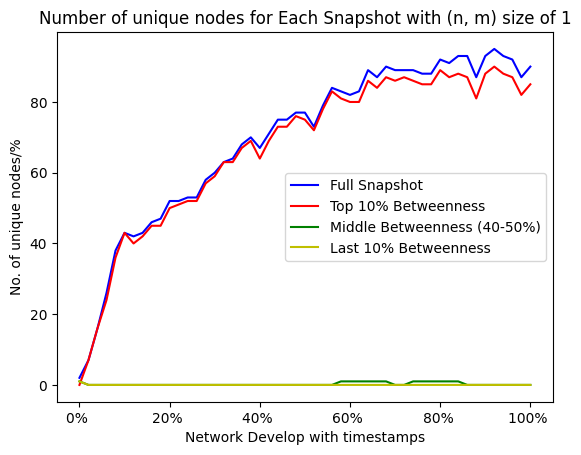

In [34]:
plt.plot(count, linestyle='-', color='b', label='Full Snapshot')
plt.plot(top, linestyle='-', color='r', label='Top 10% Betweenness')
plt.plot(mid, linestyle='-', color='g', label='Middle Betweenness (40-50%)')
plt.plot(last, linestyle='-', color='y', label='Last 10% Betweenness')
plt.xlabel('Network Develop with timestamps')
plt.ylabel('No. of unique nodes/%')
plt.xticks(range(0, 51, 10), [f'{i}% ' for i in range(0, 101, 20)])
plt.title('Number of unique nodes for Each Snapshot with (n, m) size of 1')
# plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()  

In [16]:
with open("network1_top.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines1 = [line.strip() for line in file.readlines()]

# Convert the strings to floats
top = [float(line) for line in lines1]

with open("network1_mid.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines2 = [line.strip() for line in file.readlines()]

# Convert the strings to floats
mid = [float(line) for line in lines2]

with open("network1_last.txt", "r") as file:
    # Read the lines and remove any leading/trailing whitespace
    lines3 = [line.strip() for line in file.readlines()]

# Convert the strings to floats
last = [float(line) for line in lines3]

In [135]:
# output_file1 = 'network1_top.txt'
# with open(output_file1, 'w') as file:
#     for item in top:
#         file.write(f"{item}\n")
        
# output_file2 = 'network1_mid.txt'
# with open(output_file2, 'w') as file:
#     for item in mid:
#         file.write(f"{item}\n")
        
# output_file3 = 'network1_last.txt'
# with open(output_file3, 'w') as file:
#     for item in last:
#         file.write(f"{item}\n")

In [21]:
def snapshots_properties(edges):
    avg_degree = []
    density = []
    avg_dist = []
    top_closeness = []

    for i in range(0, 3000):
        #Every 50 timestamps we take a snapshot
        i = i + 100
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        
        # Closeness Centrality Top 10%
        closeness_centrality = nx.betweenness_centrality(snapshot)
        rank = {node: centrality for node, centrality in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)}
        top_10 = list(rank.keys())[:int(0.1 * len(rank))]
        anonymity_dict = n_m_anonymity(snapshot)
        top_10_percent_nodes_values = {node: anonymity_dict[node] for node in top_10}
        
        total_nodes = snapshot.number_of_nodes()
        unique_count_top = sum(1 for count in top_10_percent_nodes_values.values() if count == 1)
        percentage_unique_top = (unique_count_top / total_nodes) * 100
        top_closeness.append(percentage_unique_top)

        # Avg Degree
        degrees = dict(snapshot.degree())
        avg_degree.append(sum(degrees.values()) / len(degrees))
        
        # Avg Distance
        if nx.is_strongly_connected(snapshot):
            avg_dist.append(nx.average_shortest_path_length(snapshot))
        else:
            avg_dist.append(0)
        
        # Density
        density.append(nx.density(snapshot))
        
        
        # Progress Indicators, Delete later
        if i == 1000:
            print("Time has traveled to 1000")
        if i == 2000:
            print("Time has traveled to 2000")
        if i == 2800:
            print("Time has traveled to 2800")
        if i == 2900:
            print("Time has traveled to 2900")         
    return avg_degree, avg_dist, top_closeness, density

In [22]:
avg_degree, avg_dist, top_closeness, density = snapshots_properties(edges)

Time has traveled to 1000
Time has traveled to 2000
Time has traveled to 2800
Time has traveled to 2900


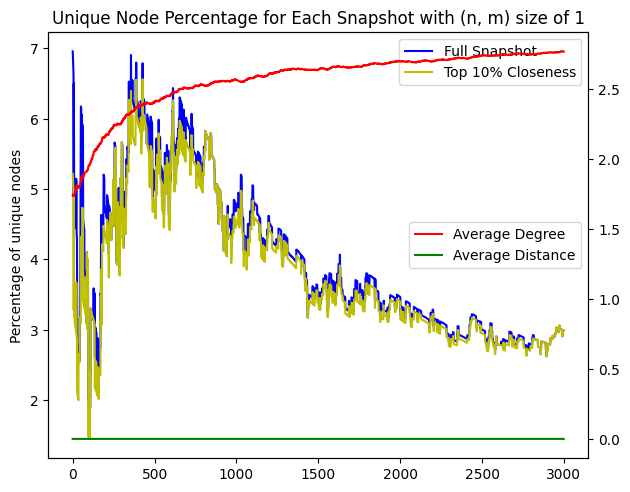

In [25]:
fig, ax1 = plt.subplots()
#ax1.set_xlable('Snapshot at Timestamp')
ax1.set_ylabel('Percentage of unique nodes')
ax1.plot(unique_percentage, linestyle='-', color='b', label='Full Snapshot')
ax1.plot(top_closeness, linestyle='-', color='y', label='Top 10% Closeness')
# ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()
ax2.set_label('Average Degree/Distance')

ax2.plot(avg_degree, linestyle='-', color='r', label='Average Degree')
ax2.plot(avg_dist, linestyle='-', color='g', label='Average Distance')
# plt.plot(density, linestyle='-', color='purple', label='Density')
# ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
# plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()  

### Network 2

In [35]:
with open('data/mooc_actions.tsv', 'r') as file:
    # ignoring the first row since they are labels
    lines = file.readlines()[1:]

unique_edges = set()
edge_list = []
for line in lines:
    parts = line.split()
    source = int(parts[1])
    target = int(parts[2])
    # Ignore self-edges and repeating edges
    if source != target and (source, target) not in unique_edges:
        edge_list.append((source, target))
        unique_edges.add((source, target))


# edge_list_file = 'data/mooc_actions.tsv'
# edges2 = []

# with open(edge_list_file, 'r') as file:
#     for line in file:
#         source, target = map(int, line.strip().split(',')[1:3])
#         edge = (source, target)
#         if edge not in edges2:
#             edges2.append(edge)   # dropping repeating edges, each edge only appear once

In [36]:
G = nx.DiGraph()
G.add_edges_from(edge_list)
print(G.number_of_nodes())
print(G.number_of_edges())

7047
178406


In [56]:
def snapshots_uniqueness2(edges):
    unique_percentage = []
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()
    
    for i in range(0, 4000):
        i = i + 400
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
            
        # print("Snapshot", i)
        # print("No. of Nodes:", snapshot.number_of_nodes(), "No. of Edges:",snapshot.number_of_edges())
            
        anonymity_dict = n_m_anonymity(snapshot)
        unique_count = sum(1 for count in anonymity_dict.values() if count == 1)
        total_nodes = snapshot.number_of_nodes()
        percentage_unique = (unique_count / total_nodes) * 100  
            
        # print("No. of Unique nodes:", unique_count, "Percentage of Uniqueness: ", percentage_unique)
            
        unique_percentage.append(percentage_unique)
        if (i == 1000):
            print("25%")
        if (i == 2000):
            print("50%")
        if (i == 3000):
            print("75%")
        if (i == 3600):
            print("90%")            
    return unique_percentage

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


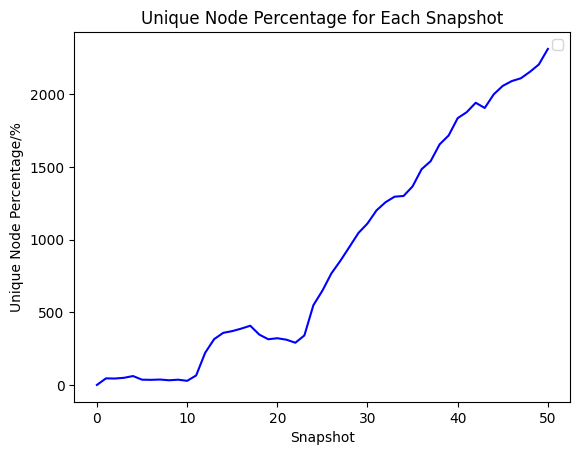

In [38]:
count2, unique_percentage2 = snapshots_uniqueness(edge_list)

plt.plot(count2, linestyle='-', color='b')
plt.xlabel('Snapshot')
plt.ylabel('Unique Node Percentage/%')
plt.title('Unique Node Percentage for Each Snapshot')
#plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()

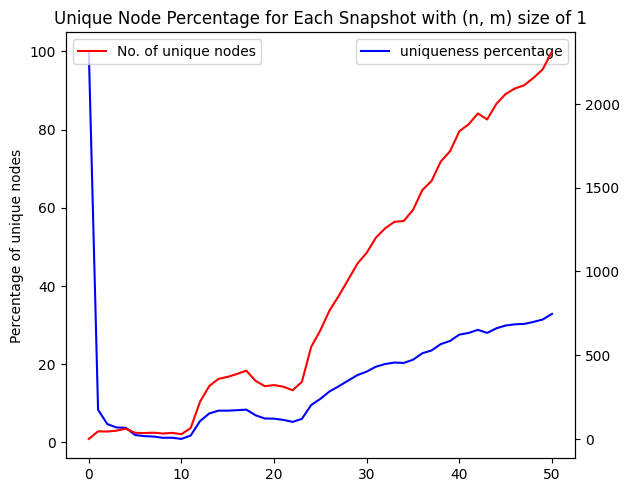

In [39]:
fig, ax1 = plt.subplots()
#ax1.set_xlable('Snapshot at Timestamp')
ax1.set_ylabel('Percentage of unique nodes')
ax1.plot(unique_percentage2, linestyle='-', color='b', label='uniqueness percentage')
# ax1.plot(top_closeness, linestyle='-', color='y', label='Top 10% Closeness')
# ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()
ax2.set_label('Average Degree/Distance')

ax2.plot(count2, linestyle='-', color='r', label='No. of unique nodes')
# ax2.plot(avg_dist, linestyle='-', color='g', label='Average Distance')
# plt.plot(density, linestyle='-', color='purple', label='Density')
# ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
# plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()  

In [59]:
def snapshots_uniqueness_betweenness2(edges):
    unique_top10 = []
    unique_mid10 = []
    unique_last10 = []
    
    G = nx.DiGraph()
    G.add_edges_from(edges)
    M = G.number_of_edges()

    for i in range(0, 4000):
        #Every 50 timestamps we take a snapshot
        i = i + 400
        sub_edge = edges[:i]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        
        anonymity_dict = n_m_anonymity(snapshot)
        rank = betweenness_centra(snapshot)

        top_10 = list(rank.keys())[:int(0.1 * len(rank))]
        last_10 = list(rank.keys())[int(0.9 * len(rank)):]
        mid_10 = list(rank.keys())[int(0.4 * len(rank)) : int(0.5 * len(rank))]
        
        top_10_percent_nodes_values = {node: anonymity_dict[node] for node in top_10}
        mid_10_percent_nodes_values = {node: anonymity_dict[node] for node in mid_10}
        last_10_percent_nodes_values = {node: anonymity_dict[node] for node in last_10}
        
        total_nodes = snapshot.number_of_nodes()
        
        # Top 10%
        unique_count_top = sum(1 for count in top_10_percent_nodes_values.values() if count == 1)
        percentage_unique_top = (unique_count_top / total_nodes) * 100
        unique_top10.append(percentage_unique_top)

        # mid 10%
        unique_count_mid = sum(1 for count in mid_10_percent_nodes_values.values() if count == 1)
        percentage_unique_mid = (unique_count_mid / total_nodes) * 100
        unique_mid10.append(percentage_unique_mid)
        
        # Last 10%
        unique_count_last = sum(1 for count in last_10_percent_nodes_values.values() if count == 1)
        percentage_unique_last = (unique_count_last / total_nodes) * 100
        unique_last10.append(percentage_unique_last)
        
        # Progress Indicators, Delete later
        if i == 2000:
            print("Time has traveled to 2000")
        if i == 3500:
            print("Time has traveled to 3500")       
    return unique_top10, unique_mid10, unique_last10

In [40]:
top, mid, last = snapshots_uniqueness_betweenness(edges)

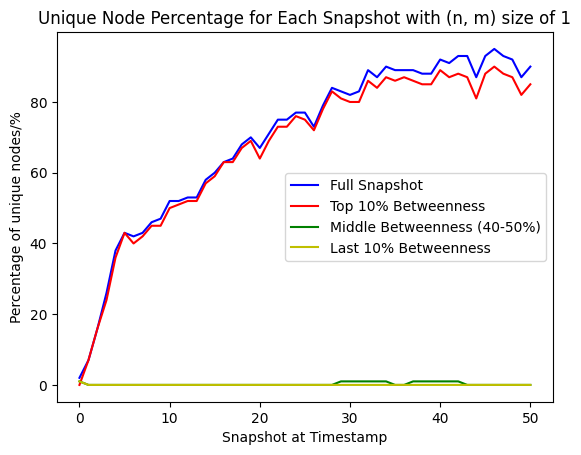

In [41]:
plt.plot(count, linestyle='-', color='b', label='Full Snapshot')
plt.plot(top, linestyle='-', color='r', label='Top 10% Betweenness')
plt.plot(mid, linestyle='-', color='g', label='Middle Betweenness (40-50%)')
plt.plot(last, linestyle='-', color='y', label='Last 10% Betweenness')
plt.xlabel('Snapshot at Timestamp')
plt.ylabel('Percentage of unique nodes/%')
plt.title('Unique Node Percentage for Each Snapshot with (n, m) size of 1')
# plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()  